# LSSM BGT distributions

I calculated the total BGT distribution of the $^{29}F(5/2^+)$ decay to $^{29}Ne(3/2^+,5/2+,7/2+)$ using the SDPF-M, SDPF-MU, and USDB interactions. In all cases I used the block extension method to calculate 400-500 states of each spin parity.

As per usual we initialize Julia packages here

In [1]:
# include("/Users/mmadurga/.julia/dev/BetaDecayUtils/src/BetaDecayUtils.jl")
# using Pkg;Pkg.add("PlotlyJS")
using DelimitedFiles,CSV,DataFrames,BetaDecayUtils,LsqFit,QuadGK,Plots

# plotly()

include("/Users/mmadurga/.julia/dev/Utilities/Julia/MonteCarlo.jl")

include("/Users/mmadurga/.julia/dev/Utilities/Julia/VandleResponses.jl")

Main.VandleResponses

The ground state of  $^{29}Ne(3/2-)$ and the $^{29}F$ $Q_{\beta}$ value are

In [2]:
quenching = 0.77^2

Ex29Ne3p = -86.826; Ex29F5p = -63.105;
Ex29Ne3pmu = -93.762
Qb = 21.8

t12=3.11e-3

0.00311

## BGT strength

Raw BGT strength for each decay path.

In [3]:
bgt3p = readdlm("data/log_Ne29_F29_sdpf-m_tr_j3p_j5p.txt",comments=true,comment_char='#')
bgt5p = readdlm("data/log_Ne29_F29_sdpf-m_tr_j5p_j5p.txt",comments=true,comment_char='#')
bgt7p = readdlm("data/log_Ne29_F29_sdpf-m_tr_j7p_j5p.txt",comments=true,comment_char='#')


bgt=[ 
    bgt3p
    bgt5p
    bgt7p
    ]


bgtsorted = bgt[sortperm(bgt[:,3]),:];

bgtnogs=bgtsorted[3:end,:]


# writedlm("sdpf-mu_F29-bgt.txt",["# Ex(MeV)"  "BGT(1/MeV)" "J*2" ])
#     open("sdpf-mu_F29-bgt.txt", "a") do io
#         writedlm(io,[round.(bgtsorted[:,1].-Ex29Ne3p,digits=6) round.(bgtsorted[:,2],digits=6) bgtsorted[:,3]])
#     end   


1498×11 Matrix{Any}:
 "3("  "2)"    -85.46   "5("  "1)"  -63.105  …  -0.0952  0.0023  0.0015  0.0
 "5("  "1)"    -85.366  "5("  "1)"  -63.105     -0.6418  0.0686  0.0686  0.0
 "5("  "2)"    -84.434  "5("  "1)"  -63.105     -0.0687  0.0008  0.0008  0.0
 "3("  "3)"    -84.055  "5("  "1)"  -63.105      0.2816  0.0198  0.0132  0.0
 "5("  "3)"    -83.933  "5("  "1)"  -63.105      0.2109  0.0074  0.0074  0.0
 "7("  "2)"    -83.925  "5("  "1)"  -63.105  …   0.0821  0.0008  0.0011  0.0
 "5("  "4)"    -83.757  "5("  "1)"  -63.105      0.295   0.0145  0.0145  0.0
 "3("  "4)"    -83.583  "5("  "1)"  -63.105      0.3239  0.0262  0.0175  0.0
 "7("  "3)"    -83.525  "5("  "1)"  -63.105      0.1054  0.0014  0.0019  0.0
 "3("  "5)"    -83.46   "5("  "1)"  -63.105      0.2024  0.0102  0.0068  0.0
 ⋮                                    ⋮      ⋱                           ⋮
 "3("  "388)"  -13.851  "5("  "1)"  -63.105      0.0     0.0     0.0     0.0
 "7("  "390)"  -13.495  "5("  "1)"  -63.105  …   0.0     

Here we plot the SDPF-M BGT without the 0.75 quenching, to be consistent with the Ikeda sum rule. Any other plot after this includes the quenching factor.

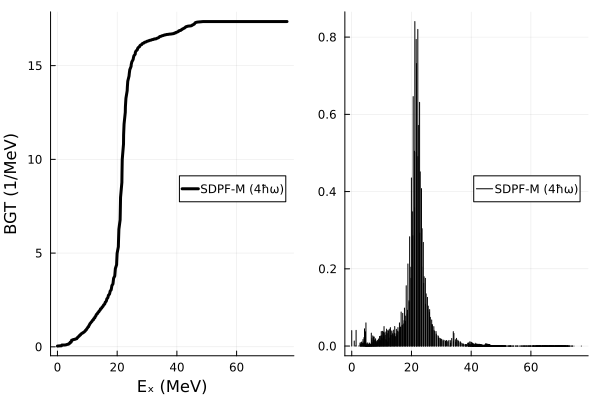

Ikeda sum rule 33 sdpf-m 29.26479999999994

In [4]:
display(plot(plot(bgtsorted[:,3].-Ex29Ne3p,cumsum(bgtsorted[:,10].*quenching),
lw=3,xlabel="Eₓ (MeV)",ylabel="BGT (1/MeV)",label="SDPF-M (4ħω)"),legend=:right,lc=:black,
plot(bgtsorted[:,3].-Ex29Ne3p,bgtsorted[:,10].*quenching,label="SDPF-M (4ħω)",lc=:black,
seriestype=:sticks)))

print("Ikeda sum rule ", 3*(20-9)," sdpf-m ",sum(bgtsorted[:,10]))

We can calculate the halflife and branching ratios in SDPF-M

In [5]:
t12SM = calculateT12(9,Qb,bgtsorted[:,3].-Ex29Ne3p,
bgtsorted[:,10].*quenching); println("T₁₂ (SDPF-M) = $t12SM")
Iᵦ =[ bgtsorted[bgtsorted[:,3].-Ex29Ne3p.<Qb,3].-Ex29Ne3p calculateIb(9,Qb,bgtsorted[:,3].-Ex29Ne3p,bgtsorted[:,10].*quenching) ]

pp=plot(Iᵦ[:,1],Iᵦ[:,2])
# pp=plot!(Iᵦ[:,1],parse.(Float64,Iᵦ[:,3])/100,line=false,marker=true)=#; display(pp)



println("Pₙ (SDPF-M) = $(sum(Iᵦ[Iᵦ[:,1].>=0.971,2]))")# sum(Iᵦ[Iᵦ[:,1].>1 .&& Iᵦ[:,1].<5,2])

# writedlm("sdpf-m_F29-Ib.txt",["# Ex(MeV)"  "Ib" ])
    open("sdpf-m_F29-Ib.txt", "a") do io
        writedlm(io,[repeat(["gtstate  :  "],length(Iᵦ[:,1])) round.(Iᵦ[:,1],digits=4) round.(Iᵦ[:,2].*100,digits=4)  ] )
        end   
# 

T₁₂ (SDPF-M) = 0.0017713039562829045
Pₙ (SDPF-M) = 0.7959288875813463


We get $T_{1/2}$ = 1.77 ms,  close-ish to the experimental value, and using the SM $Q_{\beta}$ value

Same for $P_n$ = 79.6%, compared to 98.5% experimentally.

## Experiment $I_{\beta}$ v. SDPF-M

now that we have the SDPF-M $I_{\beta}$ calculated let's plot them agains the experimental values. 

bgts.csv $\rightarrow$ Matt's first fit

allhists_Exlist.csv $\rightarrow$ Matt's latest fit (results from Xu's output)

correctedexpbgt is calculated by reducing the $I_{\beta}$ values from the fit dividing by the average neutron multiplicity of 1.2 (from Kawano's code using SDPF-MU BGT values)

>......................................................................../  009-029F   // 21.226198>
>                                                                  SUM SPECTRA AND AVERAGE ENERGIES
>
>                               gamma    neutron   Electron   Neutrino
>
>       TotalEnergy[MeV]   1.4224e+00 2.1553e+00 7.7257e+00 8.3192e+00
>
>       AverageEnergy[MeV] 1.2089e+00 1.7701e+00 7.7257e+00 8.3192e+00
>
>       Multiplicity       1.1766e+00 1.2176e+00 1.0000e+00 1.0000e+00>

>       EnergyRelease[MeV] 1.9623e+01




In [6]:
neutronmultiplicity=1.2

data = CSV.read("data/bgts.csv",DataFrame)
newdata = CSV.read("data/allhists_ExList.csv",DataFrame)

display(sum(newdata[:,3]))

expbgt=[ data[:,1]./1000. 6144.2./(1.2761^2 .*10 .^ (logftfromib.(9,t12,Qb,data[:,1]./1000,data[:,2]/100)))]

newexpbgt=[ newdata[:,1]./1000. newdata[:,8]]

newexpIb = [repeat(["gtstate  : "],length(newdata[:,1])) newdata[:,1]./1000 newdata[:,3]]

expbgt=expbgt[sortperm(expbgt[:,1]),:]

newexpbgt=newexpbgt[sortperm(newexpbgt[:,1]),:]

newexpIb[sortperm(newexpIb[:,2]),:]

correctedexpbgt=[newdata[:,1]./1000 6144.2./(#=1.2761^2 .*=#10 .^ (logftfromib.(9,t12,Qb,newdata[:,1]./1000,newdata[:,3]/(100*neutronmultiplicity))))   ]

correctedexpbgt=correctedexpbgt[sortperm(correctedexpbgt[:,1]),:]


# open("data/newIb.txt", "a") do io
#     writedlm(io,newexpIb)
# end



99.99995100000001

33×2 Matrix{Float64}:
  1.28244  0.0123167
  1.37271  0.00812387
  1.42011  0.00644553
  1.69532  0.00661663
  1.73361  0.00565207
  1.96484  0.00961346
  2.05831  0.00998046
  2.18844  0.0150282
  2.40715  0.0565247
  2.53476  0.0324963
  ⋮        
  4.4746   0.0143304
  4.81025  0.00829025
  5.05532  0.0
  5.4054   0.0145744
  5.93535  0.0140027
  9.39778  0.0133433
 10.8684   0.0368846
 13.1746   0.467812
 13.5561   0.0

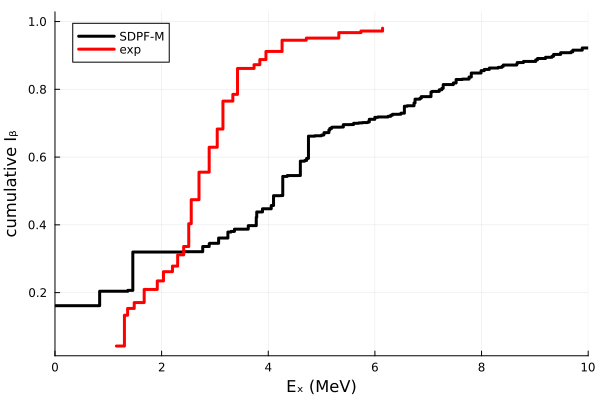

In [7]:
plot(bgtsorted[bgtsorted[:,3].-Ex29Ne3p.<Qb,3].-Ex29Ne3p ,cumsum(Iᵦ[:,2]),xlims=(0,10),
xlabel="Eₓ (MeV)",ylabel="cumulative Iᵦ",label="SDPF-M",color=:black,lw=3,seriestype=:step)
plot!(data[sortperm(data[:,1]),1]/1000.,cumsum(data[sortperm(data[:,1]),2]/100.),
linecolor=:red,color=:red,lw=3,seriestype=:step,
label="exp")

## BGT strength for $^{29}F_{gs}=1/2^+$

Raw BGT strength for each decay path.

In [8]:
bgt1p12 = readdlm("data/log_Ne29_F29_sdpf-m_tr_j1p_j1p.txt",comments=true,comment_char='#')
bgt3p12 = readdlm("data/log_Ne29_F29_sdpf-m_tr_j3p_j1p.txt",comments=true,comment_char='#')


bgt12=[ 
    bgt1p12
    bgt3p12
    ]


bgtsorted12 = bgt12[sortperm(bgt12[:,3]),:];



Here we plot the SDPF-M BGT without the 0.75 quenching, to be consistent with the Ikeda sum rule. Any other plot after this includes the quenching factor.

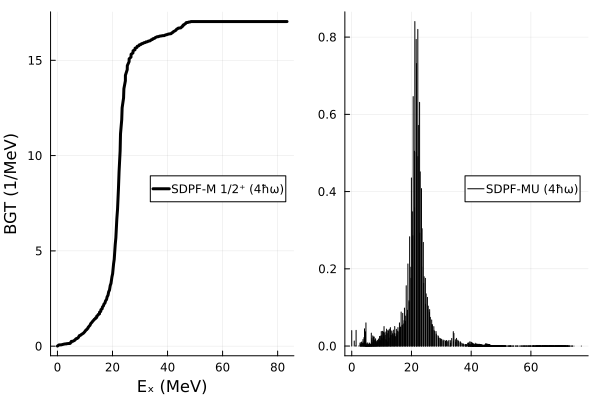

Ikeda sum rule 33 sdpf-mu 28.730099999999997

In [9]:
display(plot(plot(bgtsorted12[:,3].-Ex29Ne3p,cumsum(bgtsorted12[:,10].*quenching),
lw=3,xlabel="Eₓ (MeV)",ylabel="BGT (1/MeV)",label="SDPF-M 1/2⁺ (4ħω)"),legend=:right,lc=:black,
plot(bgtsorted[:,3].-Ex29Ne3p,bgtsorted[:,10].*quenching,label="SDPF-MU (4ħω)",lc=:black,
seriestype=:sticks)))

print("Ikeda sum rule ", 3*(20-9)," sdpf-mu ",sum(bgtsorted12[:,10]))

We can calculate the halflife and branching ratios in SDPF-M

In [10]:
t12SM12 = calculateT12(9,Qb,bgtsorted12[:,3].-Ex29Ne3p,
bgtsorted12[:,10].*quenching); display(t12SM)
Iᵦ12 =[ bgtsorted12[bgtsorted12[:,3].-Ex29Ne3p.<Qb,3].-Ex29Ne3p calculateIb(9,Qb,bgtsorted12[:,3].-Ex29Ne3p,bgtsorted12[:,10].*quenching) ]

pp=plot(Iᵦ12[:,1],Iᵦ12[:,2])
# pp=plot!(Iᵦ12[:,1],parse.(Float64,Iᵦ12[:,3])/100,line=false,marker=true)=#; display(pp)



display(sum(Iᵦ12[Iᵦ12[:,1].>1,2]))# sum(Iᵦ12[Iᵦ12[:,1].>1 .&& Iᵦ12[:,1].<5,2])

# writedlm("sdpf-mu_F29-Ib.txt",["# Ex(MeV)"  "Ib" " J*2"])
#     open("sdpf-mu_F29-Ib.txt", "a") do io
#         writedlm(io,[round.(Iᵦ12[:,1],digits=6) round.(Iᵦ12[:,2],digits=6) Iᵦ12[:,3] ] )
#         end   


0.0017713039562829045

0.6941678880694372

## USDB BGT



In [11]:
bgt3pUSDB = readdlm("data/log_Ne29_F29_usdb_tr_j3p_j5p.txt",comments=true,comment_char='#')
bgt5pUSDB = readdlm("data/log_Ne29_F29_usdb_tr_j5p_j5p.txt",comments=true,comment_char='#')
bgt7pUSDB = readdlm("data/log_Ne29_F29_usdb_tr_j7p_j5p.txt",comments=true,comment_char='#')

bgtUSDB=[ 
    bgt3pUSDB[:,3] bgt3pUSDB[:,10].*quenching 
    bgt5pUSDB[:,3] bgt5pUSDB[:,10].*quenching 
    bgt7pUSDB[:,3] bgt7pUSDB[:,10].*quenching 
    ]

bgtUSDBsorted = bgtUSDB[sortperm(bgtUSDB[:,1]),:];

plot(bgtUSDBsorted[:,1].-bgtUSDBsorted[1,1],cumsum(bgtUSDBsorted[:,2]),seriestype=:step,
xlims=(0,7),ylims=(0,1.5))

sum(bgtUSDBsorted[:,2]./quenching)



32.9996

## Experimental BGT and paper plot

Now we read the experimental BGT from James' file.

Experimental plots from Xu's output (`newexpbgt`) do not have the $(g_a/g_v)^2$ factor, therefore they must be compared to SDPF-MU BGT without quenching.

`correctedexpbgt` applies a division factor of 1.2 to account for neutron multiplicity predicted by Kawano's code.

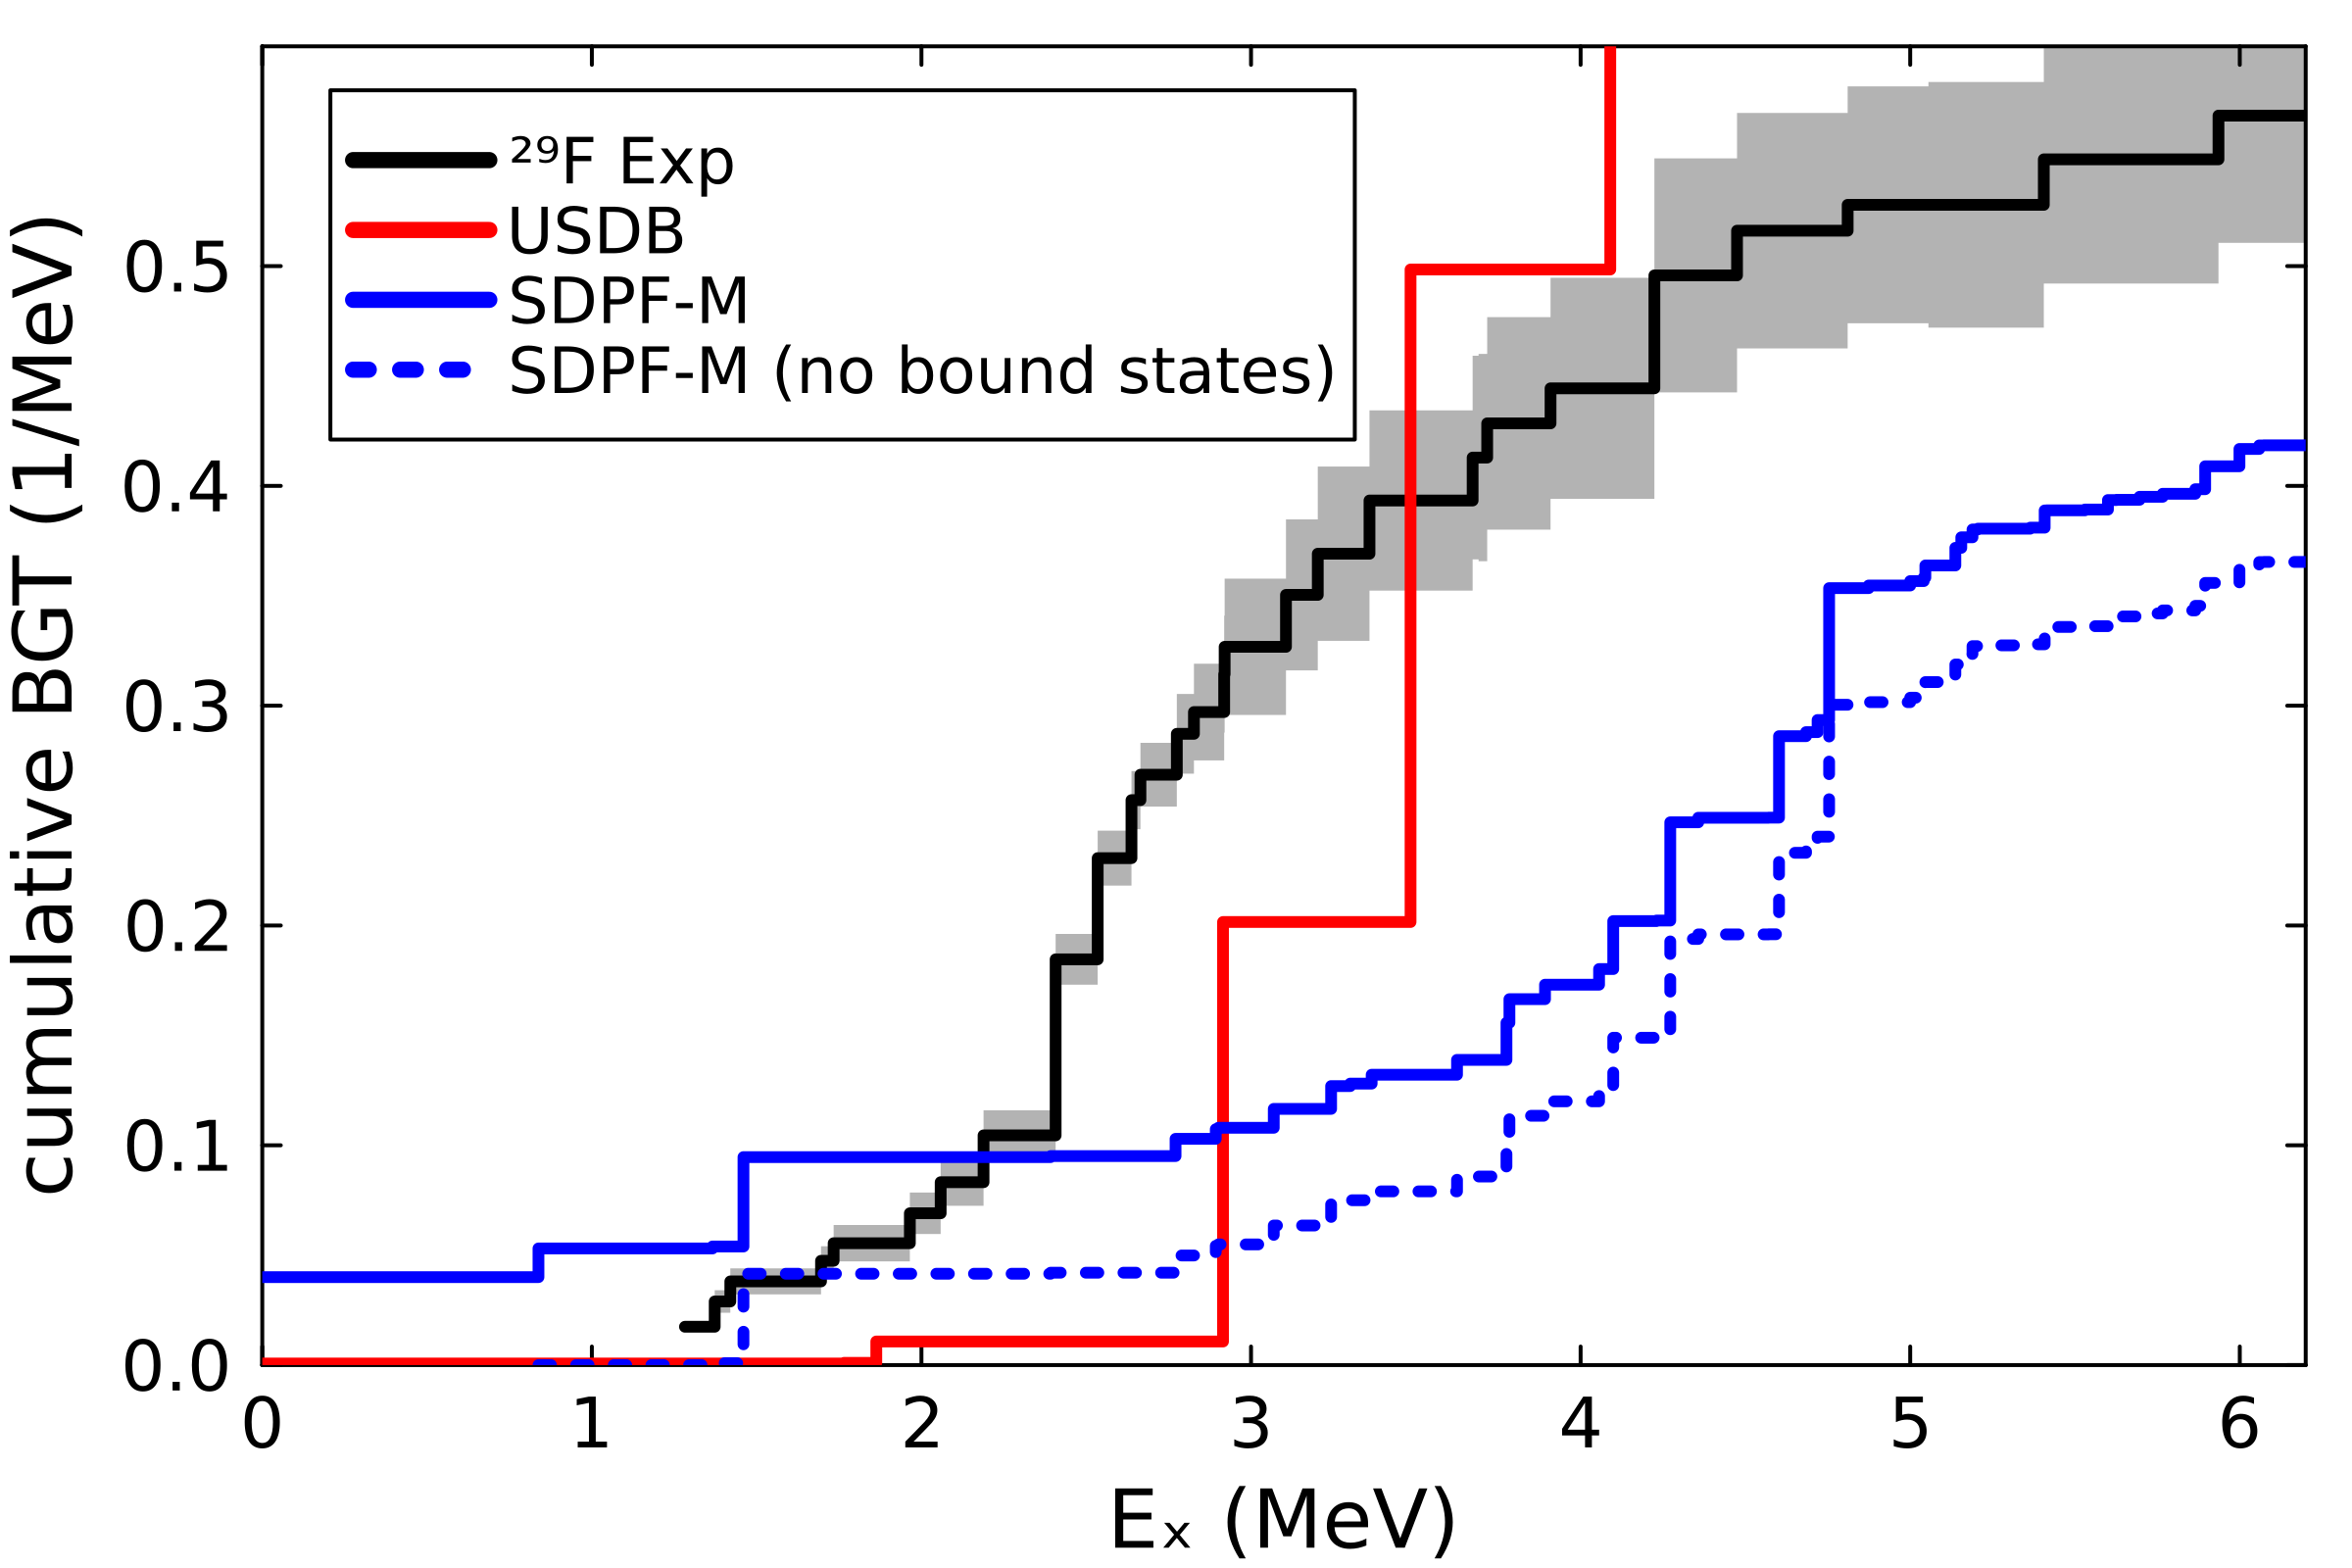

In [12]:
plot(newexpbgt[:,1],cumsum(newexpbgt[:,2]),seriestype=:step,
lw=3,label="²⁹F Exp",lcolor=:black,xlims=(0,6.2),ylims=(0,0.6),
ribbon=(cumsum(expbgt[:,2]*0.2)),fillcolor=:black,fillalpha=0.3,dpi=400,
guidefont=14,tickfont=12,legendfont=11,grid=false,framestyle=:box)

plot!(bgtUSDBsorted[:,1].-bgtUSDBsorted[1,1],cumsum(bgtUSDBsorted[:,2]),
lw=3,lcolor=:red,seriestype=:step,
label="USDB",xlabel="Eₓ (MeV)",ylabel="cumulative BGT (1/MeV)",legend=:topleft)

plot!(bgtsorted[:,3].-Ex29Ne3p,cumsum(bgtsorted[:,10]).*quenching,
lw=3,lcolor=:blue,seriestype=:step,
label="SDPF-M",xlabel="Eₓ (MeV)",ylabel="cumulative BGT (1/MeV)",legend=:topleft)

# plot!(bgtsorted12[:,3].-Ex29Ne3p,cumsum(bgtsorted12[:,10]).*quenching,
# lw=3,lcolor=:blue,seriestype=:step,ls=:dashdot,lc=:green,
# label="SDPF-M 1/2⁺",xlabel="Eₓ (MeV)",ylabel="cumulative BGT (1/MeV)",legend=:topleft)

plot!(bgtsorted[:,3].-Ex29Ne3p,cumsum(bgtsorted[:,10]).*quenching
.-sum(bgtsorted[bgtsorted[:,3].-Ex29Ne3p.<0.971,10].*quenching),
lw=3,lcolor=:blue,seriestype=:step,ls=:dot,
label="SDPF-M (no bound states)",xlabel="Eₓ (MeV)",ylabel="cumulative BGT (1/MeV)",legend=:topleft)

# savefig("29F_SM_SDPF-M_BGT.png")

## SDPF-MU

We repeat the calculations above for sdpf-mu.

In [13]:
bgt3pmu = readdlm("data/log_Ne29_F29_sdpf-mu_tr_j3p_j5p.txt",comments=true,comment_char='#')
bgt5pmu = readdlm("data/log_Ne29_F29_sdpf-mu_tr_j5p_j5p.txt",comments=true,comment_char='#')
bgt7pmu = readdlm("data/log_Ne29_F29_sdpf-mu_tr_j7p_j5p.txt",comments=true,comment_char='#')


bgtmu=[ 
    bgt3pmu
    bgt5pmu
    bgt7pmu
    ]


bgtsortedmu = bgtmu[sortperm(bgtmu[:,3]),:];




Here we plot the SDPF-MU BGT without the 0.75 quenching, to be consistent with the Ikeda sum rule.

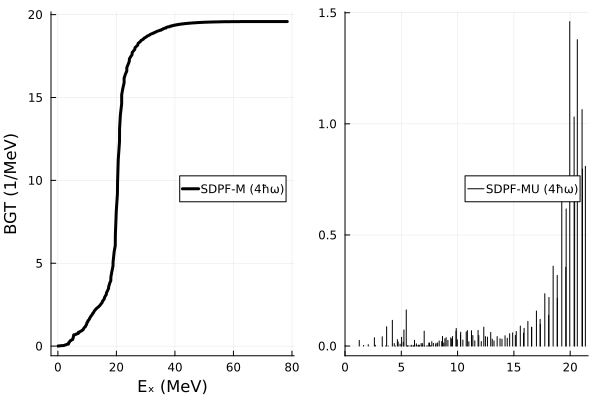

Ikeda sum rule 33 sdpf-mu 33.02780000000002

In [14]:
display(plot(plot(bgtsortedmu[:,3].-Ex29Ne3pmu,cumsum(bgtsortedmu[:,10].*quenching),
lw=3,xlabel="Eₓ (MeV)",ylabel="BGT (1/MeV)",label="SDPF-M (4ħω)"),legend=:right,lc=:black,
plot(bgtsortedmu[:,3].-Ex29Ne3pmu,bgtsortedmu[:,10].*quenching,
label="SDPF-MU (4ħω)",
lc=:black,
seriestype=:sticks,
xlims=(0,21.6))
))

print("Ikeda sum rule ", 3*(20-9)," sdpf-mu ",sum(bgtsortedmu[:,10]))

We can calculate the halflife and branching ratios in SDPF-MU

In [15]:
t12SMmu = calculateT12(9,Qb,bgtsortedmu[:,3].-Ex29Ne3pmu,
bgtsortedmu[:,10].*quenching); println("t₁₂ (SDPF-MU) = $t12SMmu")
Iᵦmu =[ bgtsortedmu[bgtsortedmu[:,3].-Ex29Ne3pmu.<Qb,3].-Ex29Ne3pmu calculateIb(9,Qb,bgtsortedmu[:,3].-Ex29Ne3pmu,bgtsortedmu[:,10].*quenching) ]

pp=plot(Iᵦmu[:,1],Iᵦmu[:,2])
# pp=plot!(Iᵦmu[:,1],parse.(Float64,Iᵦmu[:,3])/100,line=false,marker=true)=#; display(pp)



println("Pₙ (SDPF-MU)(threshold method) $(sum(Iᵦmu[Iᵦmu[:,1].>0.971,2]))")# sum(Iᵦmu[Iᵦmu[:,1].>1 .&& Iᵦmu[:,1].<5,2])
println("Pₙ (SDPF-MU)(Kawano's beoh) 80%")# sum(Iᵦmu[Iᵦmu[:,1].>1 .&& Iᵦmu[:,1].<5,2])

# writedlm("sdpf-m_F29-Ib.txt",["# Ex(MeV)"  "Ib" ])
    open("sdpf-mu_F29-Ib.txt", "a") do io
        writedlm(io,[repeat(["gtstate  :  "],length(Iᵦmu[:,1])) round.(Iᵦmu[:,1],digits=4) round.(Iᵦmu[:,2].*100,digits=4)  ] )
        end   
# 

t₁₂ (SDPF-MU) = 0.0014611503335479443
Pₙ (SDPF-MU)(threshold method) 0.9881626295685682
Pₙ (SDPF-MU)(Kawano's beoh) 80%


Experimental plots from Xu's output (`newexpbgt`) do not have the $(g_a/g_v)^2$ factor, therefore they must be compared to SDPF-MU BGT without quenching.

`correctedexpbgt` applies a division factor of 1.2 to account for neutron multiplicity predicted by Kawano's code.

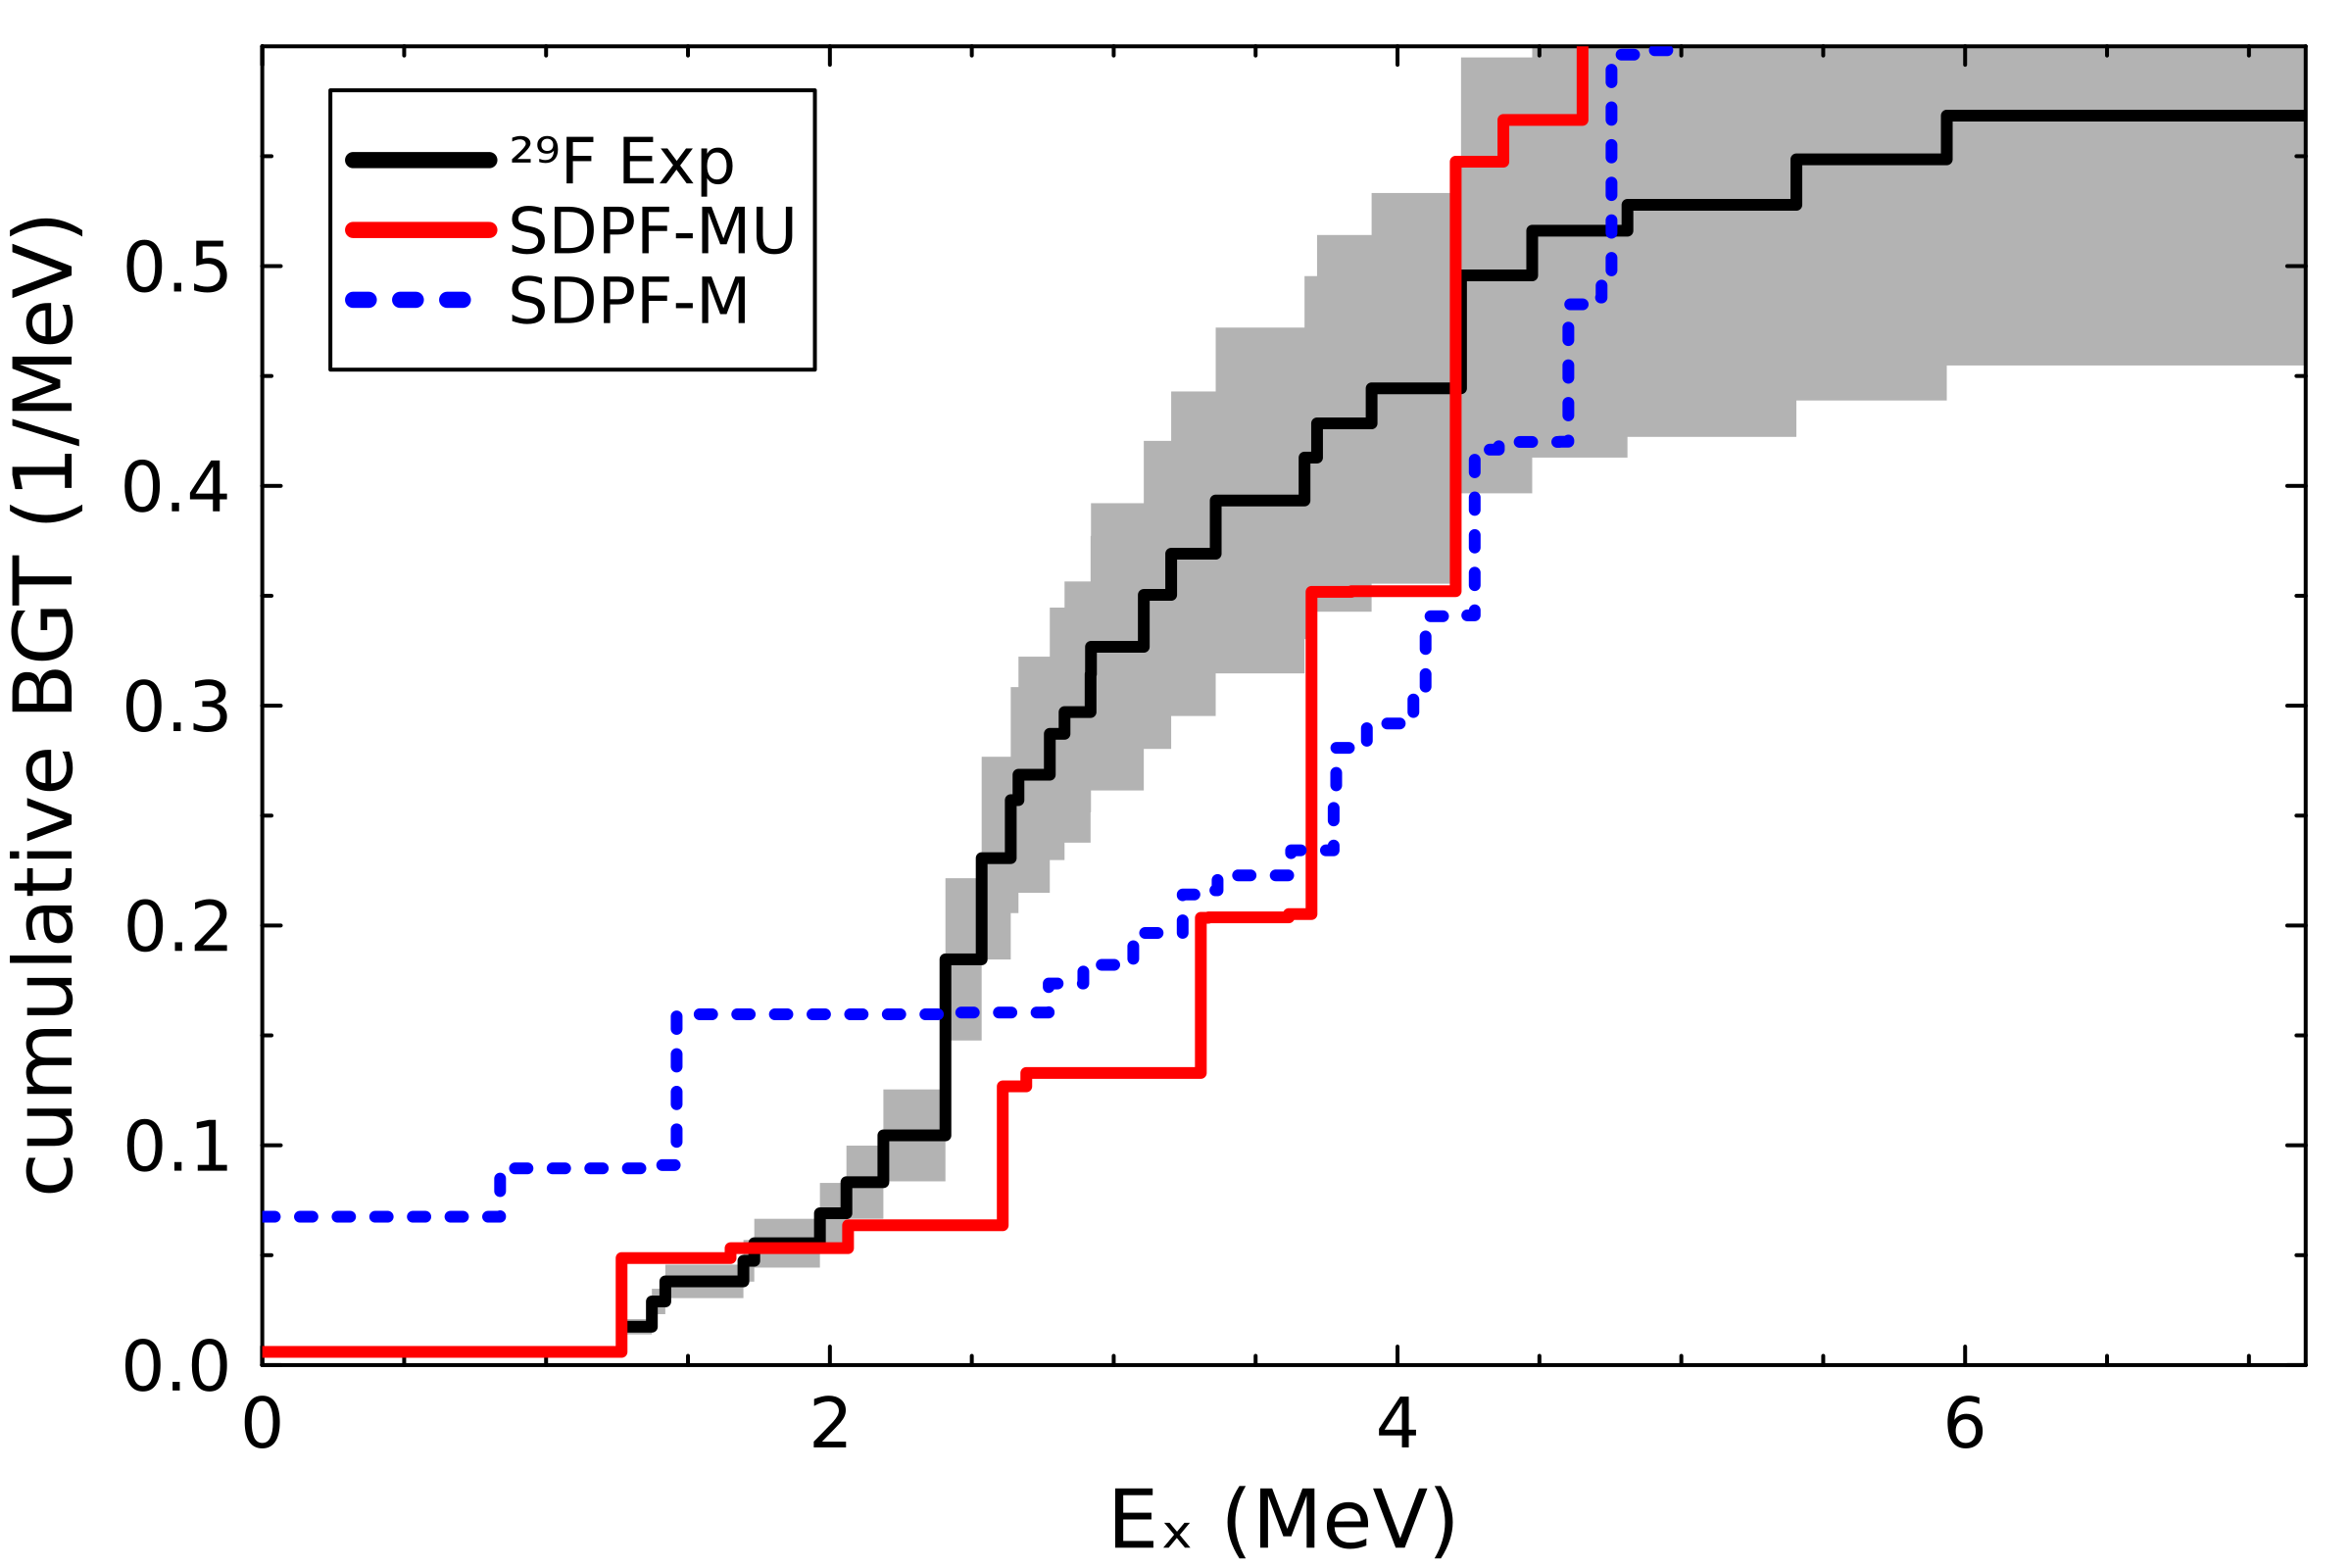

In [16]:
plot(newexpbgt[:,1],cumsum(newexpbgt[:,2]),
     seriestype=:step,
     xminorticks=4,
     yminorticks=2,
     lw=3,
     label="²⁹F Exp",
     lcolor=:black,
     xlims=(0,7.2),ylims=(0,0.6),
     ribbon=(cumsum(newexpbgt[:,2]*0.2)),
     fillcolor=:black,fillalpha=0.3,dpi=400,
     guidefont=14,tickfont=12,legendfont=11,
     grid=false,
     framestyle=:box)



plot!(bgtsortedmu[:,3].-Ex29Ne3pmu,cumsum(bgtsortedmu[:,10])#=.*quenching=#,
      lw=3,
      lcolor=:red,
      seriestype=:step,
      label="SDPF-MU",
      xlabel="Eₓ (MeV)",ylabel="cumulative BGT (1/MeV)",
      legend=:topleft)


plot!(bgtsorted[:,3].-Ex29Ne3p,cumsum(bgtsorted[:,10])#=.*quenching=#
#=.-sum(bgtsorted[bgtsorted[:,3].-Ex29Ne3p.<0.971,10].*quenching=#,
      lw=3,
      lcolor=:blue,
      seriestype=:step,
      ls=:dot,
      label="SDPF-M",xlabel="Eₓ (MeV)",ylabel="cumulative BGT (1/MeV)",
      legend=:topleft)

# savefig("29F_SM_SDPF-M_BGT.png")

## Neutron time-of-flight spectrum from Kawano's BEOH and SDPF-MU BGT.

I fed the beta branching ratios calculated above to BEOH to get the $P_{xn}$ and the neutron distribution (in file beoh_out_sdpfmu.dat).

In [43]:
beoh=readdlm("data/beoh_out_sdpfmu.dat",comments=true,comment_char='#');
println("Σn(beoh) = $(sum(beoh[:,4]))")

Σn(beoh) = 12.176231815312638


We need the neutron efficiency curve to adjust the intensity of each neutron bin.

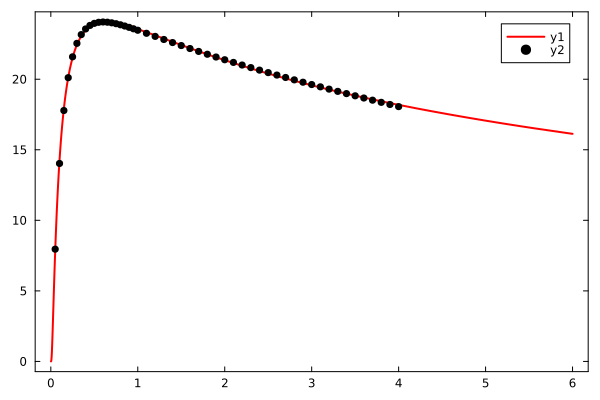

In [18]:
neutroneffcurve=readdlm("calibrations/neutronefficiency.txt")

εᵥ(e,p)=10 .^(p[1].+p[2].*log10.(e)+p[3].*log10.(e).^2 .+ p[4].*log10.(e).^3 .+ p[5].*log10.(e).^4)

vandlefit=curve_fit(εᵥ,neutroneffcurve[:,1],neutroneffcurve[:,2],[1,0.01,0.001,0.0001,0.00001])

plot(e->εᵥ(e,vandlefit.param),0,6,lcolor=:red,lw=2)

scatter!(neutroneffcurve[:,1],neutroneffcurve[:,2],
mc=:black,
framestyle=:box,grid=false)

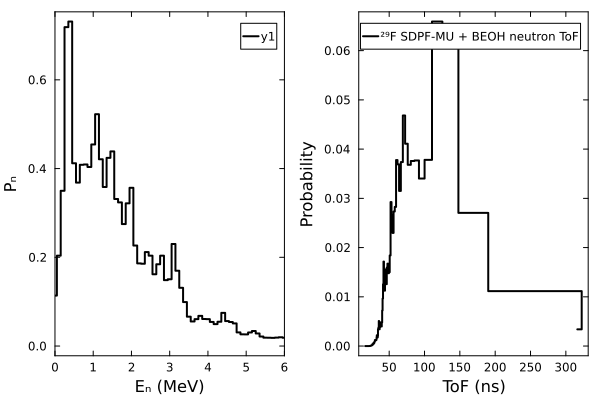

In [58]:
# general physics conditions

c = 30 #cm/ns
mₙ = 998 # MeV/c^2

path=100

ToF = 1/sqrt(2) * path * sqrt.(mₙ .* beoh[:,1].+0.05) ./ (c .* beoh[:,1].+0.05)

detectedIₙ=beoh[:,4]./sum(beoh[:,4]).*εᵥ(beoh[:,1].+0.05,vandlefit.param)/100
norm=sum(detectedIₙ)

neutrons = [ToF detectedIₙ/norm]

plot(plot(beoh[:,1],beoh[:,4],
     lc=:black,lw=2,
     framestyle=:box,grid=false,
     xlims=(0,6),
     seriestype=:step,
     xlabel="Eₙ (MeV)",
     ylabel="Pₙ"),

     plot(neutrons[:,1],neutrons[:,2],
     lc=:black,lw=2,
     framestyle=:box,grid=false,
     seriestype=:step,
     xlabel="ToF (ns)",ylabel="Probability",
     label="²⁹F SDPF-MU + BEOH neutron ToF"))



In [69]:
prenormobservedtof(t)=sum(VandleResponses.isolderesponse.(t,neutrons[:,2],neutrons[:,1],path))

normalization=quadgk(t->prenormobservedtof(t), 0, Inf, rtol=1e-3);println("normalization = $normalization ")

observedtof(t)=prenormobservedtof(t)./normalization

int= quadgk(observedtof, 0, Inf, rtol=1e-3);println("∫ρₙ(t)dt = $int ")

totalneutrons=4000
plot(t->totalneutrons*observedtof(t),10,300,
    framestyle=:box,grid=false,
    xlabel="ToF (ns)",ylabel="P",
    label="beoh+SDPF-MU vandle response",
    lc=:black,lw=2)

normalization = (1.0891476497644186, 0.0010426634492149908) 


MethodError: MethodError: no method matching *(::Tuple{Float64, Float64}, ::Float64)
The function `*` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:596
  *(!Matched::Bool, ::T) where T<:AbstractFloat
   @ Base bool.jl:179
  *(!Matched::Missing, ::Number)
   @ Base missing.jl:123
  ...


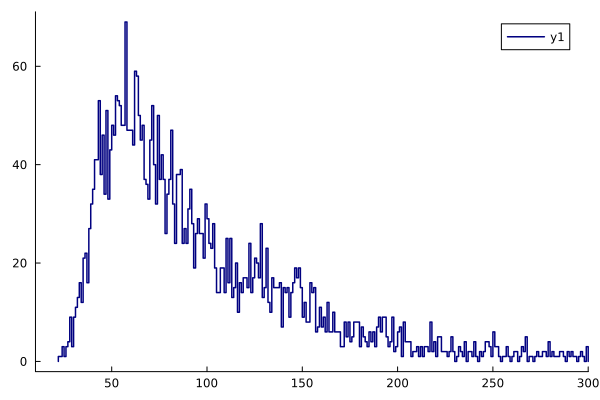

In [61]:
peaksample=MonteCarlo.mcreject(0.1,10,300,totalneutrons,t->sum(VandleResponses.isolderesponse.(t,neutrons[:,2],neutrons[:,1],path)))

plot(peaksample,
    xlims=(10,300),
    lc=:navy,lw=1.5,
    framstyle=:box,grid=false,
    seriestype=:stephist,nbins=290)
